# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Cici Yuriza
- Email: ciciyuriza999@gmail.com
- Id Dicoding: yuriza

## Persiapan

### Menyiapkan library yang dibutuhkan

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [82]:
df['Attrition'].isna().sum()

412

##### Statistika Deskriptive

In [83]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [84]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [85]:
df['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [86]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [87]:
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [88]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [89]:
df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [90]:
# menghitung jumlah masing2 kategori performance rating
value_counts = df['PerformanceRating'].value_counts()

# Menghitung total nilai
total_values = value_counts.sum()

# Menghitung persentase untuk setiap nilai
percentages = (value_counts / total_values) * 100

print(percentages)

PerformanceRating
3    84.62585
4    15.37415
Name: count, dtype: float64


In [91]:
df['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [92]:
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [93]:
df['TrainingTimesLastYear'].value_counts()

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64

In [94]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [95]:
df['YearsSinceLastPromotion'].value_counts()

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

In [96]:
df['YearsWithCurrManager'].value_counts()

YearsWithCurrManager
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: count, dtype: int64

In [97]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [98]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [99]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [100]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [101]:
# menghitung jumlah masing2 kategori Gender
value_counts = df['Gender'].value_counts()

# Menghitung total nilai
total_values = value_counts.sum()

# Menghitung persentase untuk setiap nilai
percentages = (value_counts / total_values) * 100

print(percentages)

Gender
Male      60.0
Female    40.0
Name: count, dtype: float64


In [102]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [103]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [104]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [105]:
df['Attrition'].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

Employee data memiliki 1470 baris dan 35 kolom.
Terdapat 412 missing value pada kolom Attrition.

Statistika deskriptif:
1. Rata-rata usia karyawan adalah 36 tahun.
2. Rata-rata daily rate \$802.49 dengan maksimum \$1499.
3. Jarak kantor ke rumah masing-masing karyawan rata-rata 9.19 km.
4. Sebagian besar karyawan memiliki gelar sarjana.
5. EnvironmentSatisfaction paling banyak berada di angka 3 dan 4 (high dan very high).
6. Rata-rata hourly rate (gaji per jam) adalah \$65.8 dengan maksimum \$100 dan minimum \$30.
7. JobInvolvement paling banyak berada pada level 3 (high).
8. Sebagian besar karyawan berada pada JobLevel 1 dan 2.
9. JobSatisfaction paling banyak pada level 4 dan 3 (very high dan high).
10. Rata-rata MonthlyIncome \$6502 dengan maksimum \$19999 dan minimum \$1000.
11. Rata-rata MonthlyRate \$14313.
12. NumCompaniesWorked paling banyak 1, paling sedikit 8.
13. PercentSalaryHike (persentase kenaikan gaji dari tahun lalu) rata-rata 15%.
14. Performance Rating karyawan hanya ada dua level, dengan level tertinggi 3 sekitar 84.63%, sisanya level 4.
15. RelationshipSatisfaction karyawan paling tinggi pada level high dan very high.
16. StandardHours karyawan dalam seminggu adalah 80 jam.
17. StockOptionLevel karyawan paling tinggi adalah level 0; makin tinggi level makin sedikit jumlah karyawan yang memilikinya.
18. TotalWorkingYears karyawan rata-rata 11 tahun, minimum 0 tahun dan maksimum 40 tahun.
19. TrainingTimesLastYear paling banyak 2 kali dan 3 kali.
20. WorkLifeBalance rata-rata berada pada level 3 (excellent).
21. YearsAtCompany karyawan rata-rata 7 tahun, minimum 0 dan maksimum 40 tahun.
22. YearsInCurrentRole karyawan rata-rata 4 tahun, minimum 0 tahun dan maksimum 18 tahun.
23. YearsSinceLastPromotion paling banyak adalah 0, dengan 581 karyawan yang belum dipromosikan sejak mereka bergabung. Maksimum adalah 15 tahun yaitu sekitar 13 karyawan.
24. YearsWithCurrManager paling banyak adalah 2 tahun, sekitar 344 karyawan.
25. Sebagian besar karyawan berstatus menikah (Married).
26. Semua karyawan berusia di atas 18 tahun.
27. Hanya sekitar 416 karyawan yang bekerja secara over time.
28. 60% karyawan adalah laki-laki.
29. Sebagian besar karyawan termasuk kategori Travel-Rarely.
30. Terdapat 179 karyawan yang mengalami attrition, 879 karyawan yang tidak mengalami attrition, dan ada 412 karyawan yang tidak terdata.

##### EDA

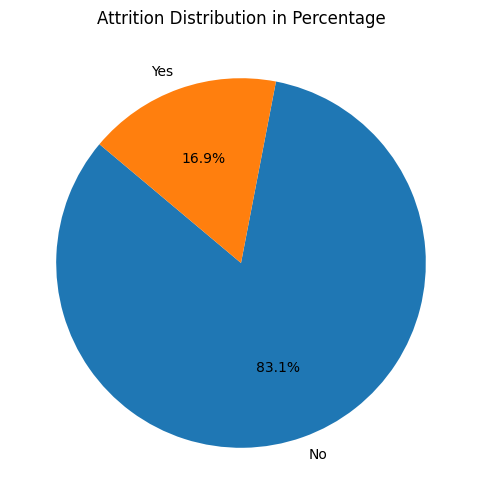

In [106]:
# Hitung persentase untuk setiap kategori Attrition
attrition_counts = df['Attrition'].value_counts()

# Buat plot pie
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=["No","Yes"], autopct='%1.1f%%', startangle=140)
plt.title('Attrition Distribution in Percentage')
plt.show()

Insight :


*   Sekitar 16.9% karyawan mengalami attrition.






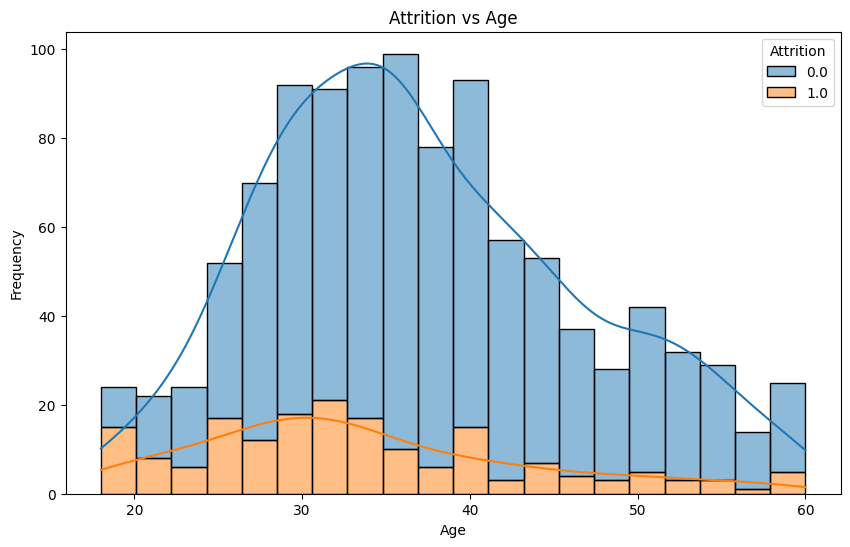

In [107]:
# Attrition vs Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True,bins=20)
plt.title('Attrition vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight :
* Attrition cukup tinggi pada usia <= 40 tahun.



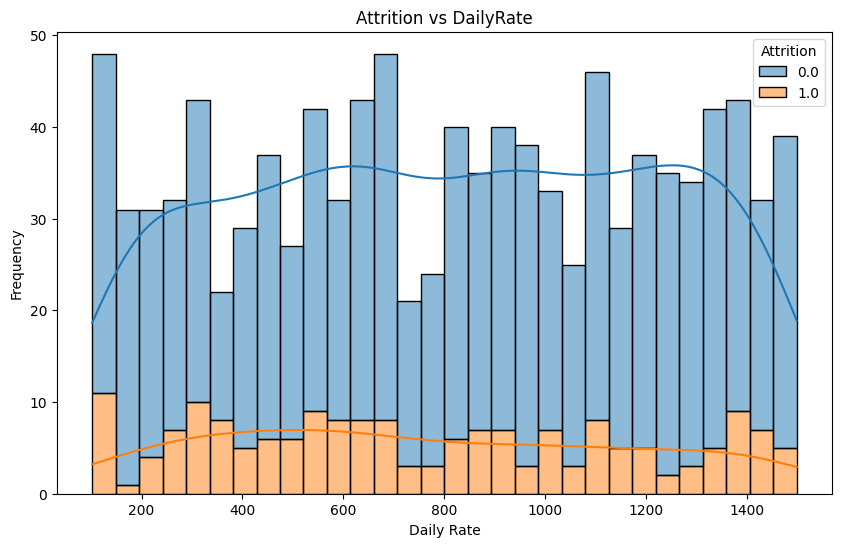

In [108]:
# Attrition vs DailyRate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DailyRate', hue='Attrition', multiple='stack', kde=True, bins=30)
plt.title('Attrition vs DailyRate')
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')
plt.show()

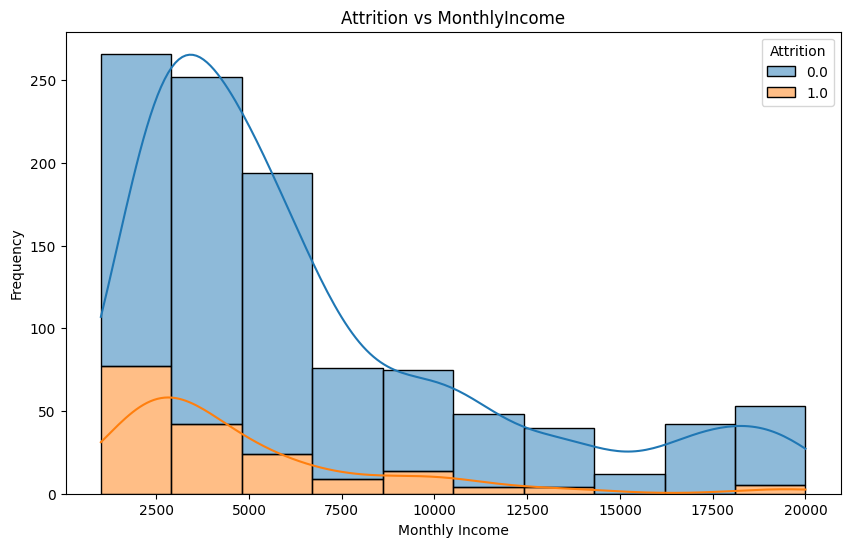

In [109]:
# Attrition vs MonthlyIncome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True, bins=10)
plt.title('Attrition vs MonthlyIncome')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

Insight :      
* Attrition tinggi pada karyawan dengan pendapatan bulanan kurang dari \$5000.

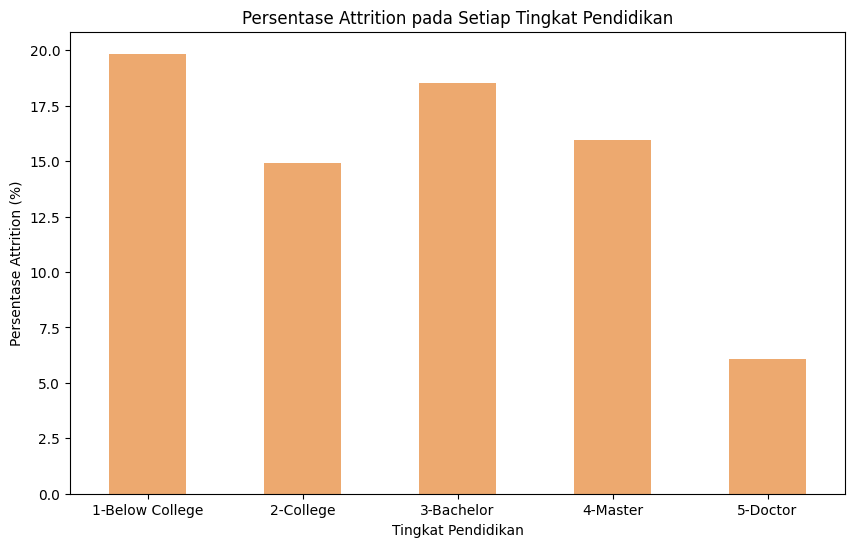

In [110]:
# Filter DataFrame untuk menghilangkan nilai null pada Attrition
df_filtered = df.dropna(subset=['Attrition'])

# Hitung total jumlah karyawan pada setiap tingkat pendidikan
total_per_education = df_filtered['Education'].value_counts()

# Hitung jumlah karyawan yang mengalami Attrition pada setiap tingkat pendidikan
attrition_counts = df_filtered.groupby('Education')['Attrition'].sum()

# Hitung persentase Attrition pada setiap tingkat pendidikan
attrition_percentages = (attrition_counts / total_per_education) * 100

# Plot barplot
plt.figure(figsize=(10, 6))
attrition_percentages.plot(kind='bar', color='#EDA96F')
plt.title('Persentase Attrition pada Setiap Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Persentase Attrition (%)')
plt.xticks([0, 1, 2, 3, 4], ["1-Below College", "2-College", "3-Bachelor", "4-Master", "5-Doctor"],rotation=0) # Rotasi label sumbu x agar tidak tumpang tindih
plt.show()

Insight :      
* Tingkat attrisi untuk tingkat pendidikan adalah sebagai berikut: di bawah perguruan tinggi(Bellow College) memiliki tingkat attrisi tertinggi sebesar 19%, sementara tingkat perguruan tinggi(College), sarjana(Bachelor), dan magister(Master) semuanya memiliki tingkat attrisi di atas 14%.

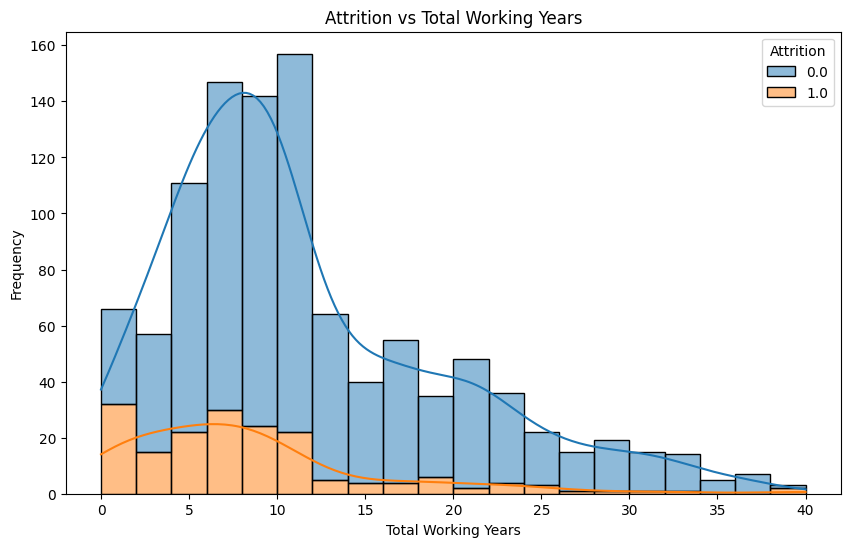

In [111]:
# Attrition vs TotalWorkingYears
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='stack', kde=True, bins=20)
plt.title('Attrition vs Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.show()

Insight :
* Total Working Years dibawah 13 Tahun memiliki tingkat attrition yang tinggi.

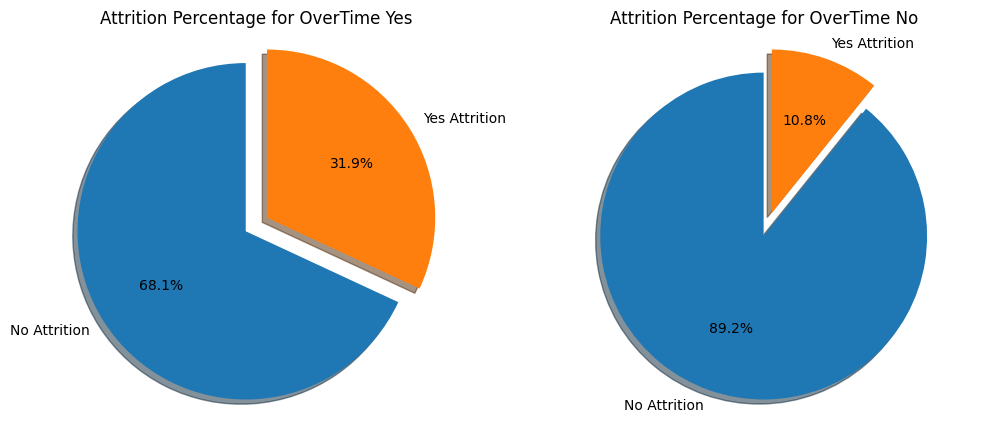

In [112]:
# Menghitung persentase
attrition_overtime = df.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby(['OverTime']).size().reset_index(name='Total')
attrition_overtime = attrition_overtime.merge(total_counts, on='OverTime')
attrition_overtime['Percentage'] = (attrition_overtime['Count'] / attrition_overtime['Total']) * 100

# Pie chart for OverTime Yes
overtime_yes = attrition_overtime[attrition_overtime['OverTime'] == 'Yes']
# labels_yes = overtime_yes['Attrition']
sizes_yes = overtime_yes['Percentage']
explode_yes = (0.15, 0)  # explode 1st slice for better visualization

# Pie chart for OverTime No
overtime_no = attrition_overtime[attrition_overtime['OverTime'] == 'No']
# labels_no = overtime_no['Attrition']
sizes_no = overtime_no['Percentage']
explode_no = (0.15, 0)  # explode 1st slice for better visualization

# Creating the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the pie chart for OverTime Yes
ax1.pie(sizes_yes, explode=explode_yes, labels=['No Attrition','Yes Attrition'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Attrition Percentage for OverTime Yes')

# Plotting the pie chart for OverTime No
ax2.pie(sizes_no, explode=explode_no, labels=['No Attrition','Yes Attrition'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Attrition Percentage for OverTime No')

# Display the plots
plt.show()

Insight :
* 31% karyawan yang lembur mengalami attrisi.
* 10% karyawan yang tidak lembur mengalami attrisi.

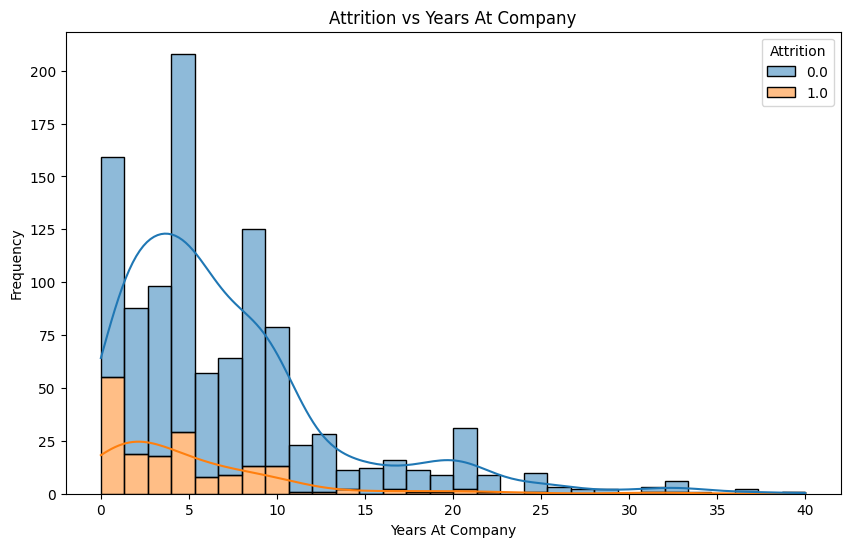

In [113]:
# Attrition vs YearsAtCompany
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', kde=True, bins=30)
plt.title('Attrition vs Years At Company')
plt.xlabel('Years At Company')
plt.ylabel('Frequency')
plt.show()

Insight :
* Attrisi tertinggi terjadi pada karyawan dengan masa kerja 0 tahun.
* Karyawan dengan masa kerja di bawah 5 tahun memiliki tingkat attrisi yang tinggi.

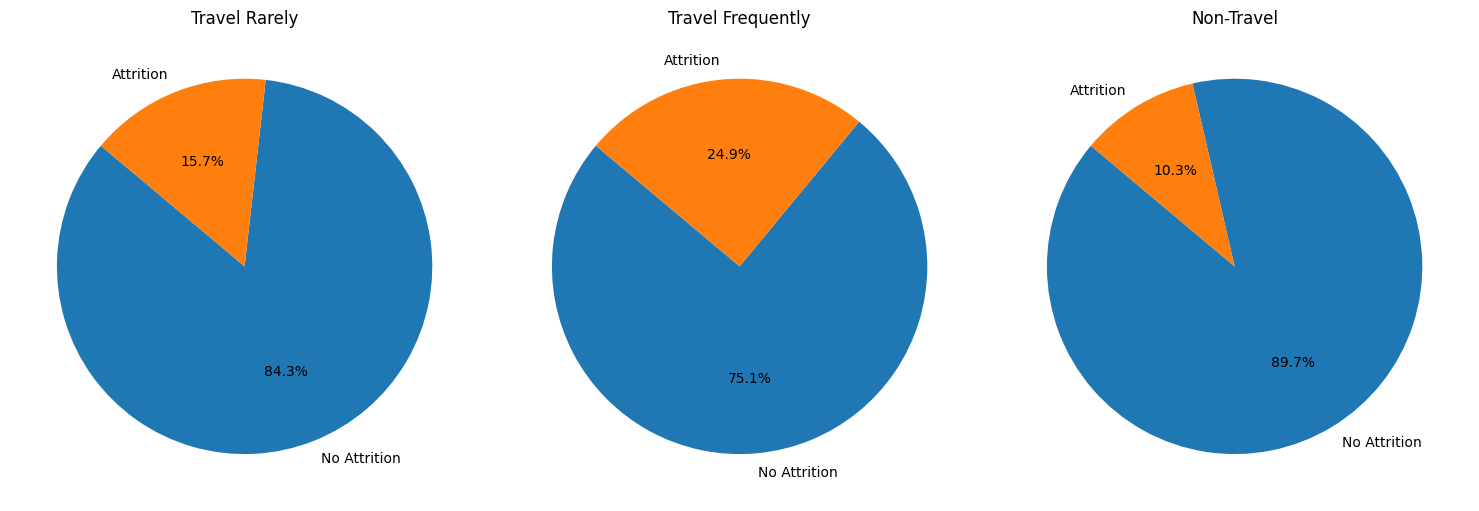

In [114]:
# Hitung jumlah karyawan dengan dan tanpa attrition untuk setiap jenis BusinessTravel
attrition_by_travel = df.groupby(['BusinessTravel', 'Attrition']).size().unstack(fill_value=0)

# Hitung total karyawan untuk setiap jenis BusinessTravel
total_by_travel = attrition_by_travel.sum(axis=1)

# Hitung persentase attrition untuk setiap kategori BusinessTravel
attrition_percentage_by_travel = (attrition_by_travel.T / total_by_travel).T * 100

# Plot pie untuk masing-masing kategori BusinessTravel
plt.figure(figsize=(15, 5))

# Travel Rarely
plt.subplot(1, 3, 1)
plt.pie(attrition_percentage_by_travel.loc['Travel_Rarely'], labels=['No Attrition', 'Attrition'], autopct='%1.1f%%', startangle=140)
plt.title('Travel Rarely')

# Travel Frequently
plt.subplot(1, 3, 2)
plt.pie(attrition_percentage_by_travel.loc['Travel_Frequently'], labels=['No Attrition', 'Attrition'], autopct='%1.1f%%', startangle=140)
plt.title('Travel Frequently')

# Non-Travel
plt.subplot(1, 3, 3)
plt.pie(attrition_percentage_by_travel.loc['Non-Travel'], labels=['No Attrition', 'Attrition'], autopct='%1.1f%%', startangle=140)
plt.title('Non-Travel')

plt.tight_layout()
plt.show()


Insight :
* Travel Frequently paling tinggi tingkat attritionnya mencapai 24.9%

In [115]:
# Fungsi untuk menghitung persentase attrition
def calculate_attrition_percentage(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    total_counts = attrition_counts.sum(axis=1)
    attrition_percentage = (attrition_counts.T / total_counts).T * 100
    return attrition_percentage

# Hitung persentase attrition untuk setiap kolom yang diminta
columns_to_analyze = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
attrition_percentages = {col: calculate_attrition_percentage(df, col) for col in columns_to_analyze}

# Tampilkan hasil persentase attrition 0 dan 1
for col, percentages in attrition_percentages.items():
    print(f"\nPersentase Attrition untuk {col}:\n{percentages}\n")



Persentase Attrition untuk Department:
Attrition                     0.0        1.0
Department                                  
Human Resources         84.210526  15.789474
Research & Development  84.736091  15.263909
Sales                   79.310345  20.689655


Persentase Attrition untuk EducationField:
Attrition               0.0        1.0
EducationField                        
Human Resources   86.666667  13.333333
Life Sciences     83.944954  16.055046
Marketing         78.688525  21.311475
Medical           86.060606  13.939394
Other             83.050847  16.949153
Technical Degree  73.958333  26.041667


Persentase Attrition untuk Gender:
Attrition        0.0        1.0
Gender                         
Female     83.789954  16.210046
Male       82.580645  17.419355


Persentase Attrition untuk JobRole:
Attrition                        0.0        1.0
JobRole                                        
Healthcare Representative  90.909091   9.090909
Human Resources            80.0

Insight :
* Departemen Sales memiliki tingkat attrition mencapai 20%, yang 5% lebih tinggi dibandingkan dengan departemen lain.
* Bidang Pendidikan dengan gelar Teknik memiliki tingkat attrition tertinggi, mencapai 26%.
* Tidak terdapat perbedaan signifikan dalam persentase attrition antara gender Female dan Male.
* Peran Pekerjaan 'Sales Representative' memiliki tingkat attrition tertinggi, mencapai 43%.
* Status Pernikahan 'Single' memiliki tingkat attrition tertinggi, mencapai 26%.

## Data Preparation / Preprocessing

In [116]:
# Handling Duplicate Data

df.duplicated().sum()


0

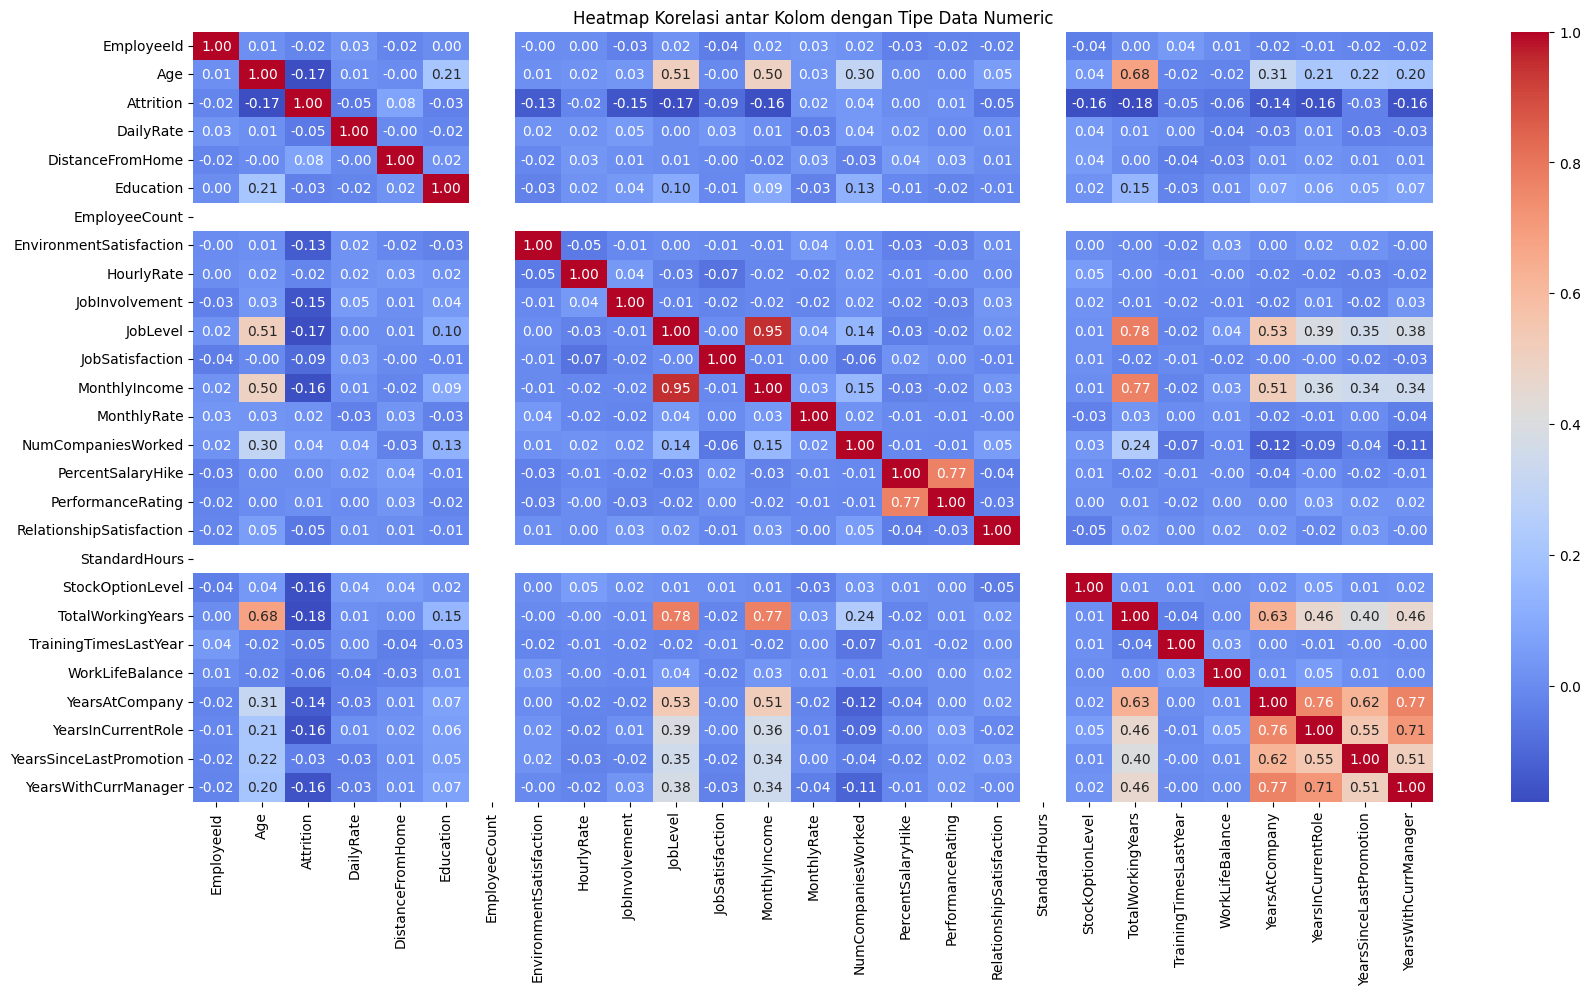

In [117]:
# Memilih kolom dengan tipe data float
float_columns = df.select_dtypes(include=['float','int'])

# Membuat heatmap
plt.figure(figsize=(20,10))
sns.heatmap(float_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Kolom dengan Tipe Data Numeric')
plt.show()

In [118]:
# drop kolom yang tidak diperlukan dan kolom yang memiliki correlation > 0.5
df.drop(columns=['EmployeeId','EmployeeCount','Gender', 'Over18', 'StandardHours','JobLevel','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','PerformanceRating','YearsAtCompany','MonthlyRate','DailyRate','HourlyRate'], inplace=True)

In [119]:
# Handling Missing Value

# Separate rows with and without missing values in the 'Attrition' column
# Data kosong selanjutnya akan digunakan untuk testing model machine learning.
df_test = df[df['Attrition'].isnull()].reset_index().drop('index',axis=1)
df_train = df[df['Attrition'].notnull()].reset_index().drop('index',axis=1)

print("Total Data Testing =", df_test.shape[0])
print("Total Data Training =", df_train.shape[0])

Total Data Testing = 412
Total Data Training = 1058


## Modeling

In [120]:
# Kolom kategorikal yang akan di-encode
categorical_columns = ['BusinessTravel','Department', 'EducationField', 'JobRole', 'OverTime', 'MaritalStatus']

# OneHotEncoder untuk kolom kategorikal
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df_train[categorical_columns])

# Mendapatkan nama kolom baru setelah encoding
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Membuat DataFrame baru dengan data yang sudah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Menggabungkan DataFrame asli dengan DataFrame yang sudah di-encode
df_encoded = pd.concat([df_train.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Pisahkan fitur dan target
X = df_encoded.drop(['Attrition'], axis=1)
y = df_encoded['Attrition']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Melatih model RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi menggunakan set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.8415094339622642

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       215
         1.0       1.00      0.16      0.28        50

    accuracy                           0.84       265
   macro avg       0.92      0.58      0.59       265
weighted avg       0.87      0.84      0.79       265



In [121]:
# Simpan model
joblib.dump(model, 'trained_model.pkl')

# Simpan encoder
joblib.dump(encoder, 'encoder.pkl')


['encoder.pkl']

## Evaluation

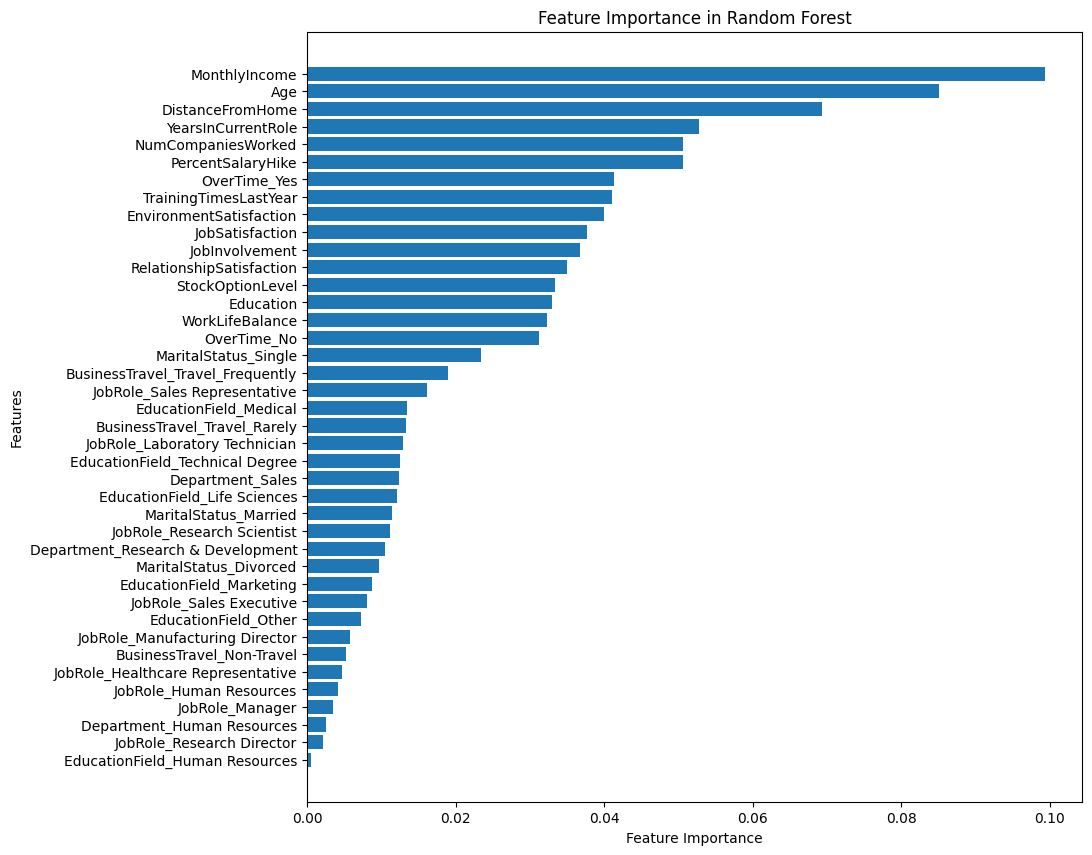

In [122]:
# Menampilkan feature importance
feature_importances = model.feature_importances_
features = X.columns

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Mengurutkan berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan plot
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [123]:
# ambil sepuluh fitur penting
# Mengurutkan berdasarkan importance dan ambil 10 fitur penting pertama
top_10_features = importance_df.nlargest(10, 'Importance')

# Menampilkan 10 fitur penting
print(top_10_features)

                    Feature  Importance
6             MonthlyIncome    0.099374
0                       Age    0.085070
1          DistanceFromHome    0.069370
13       YearsInCurrentRole    0.052746
7        NumCompaniesWorked    0.050621
8         PercentSalaryHike    0.050595
36             OverTime_Yes    0.041327
11    TrainingTimesLastYear    0.041029
3   EnvironmentSatisfaction    0.039979
5           JobSatisfaction    0.037638


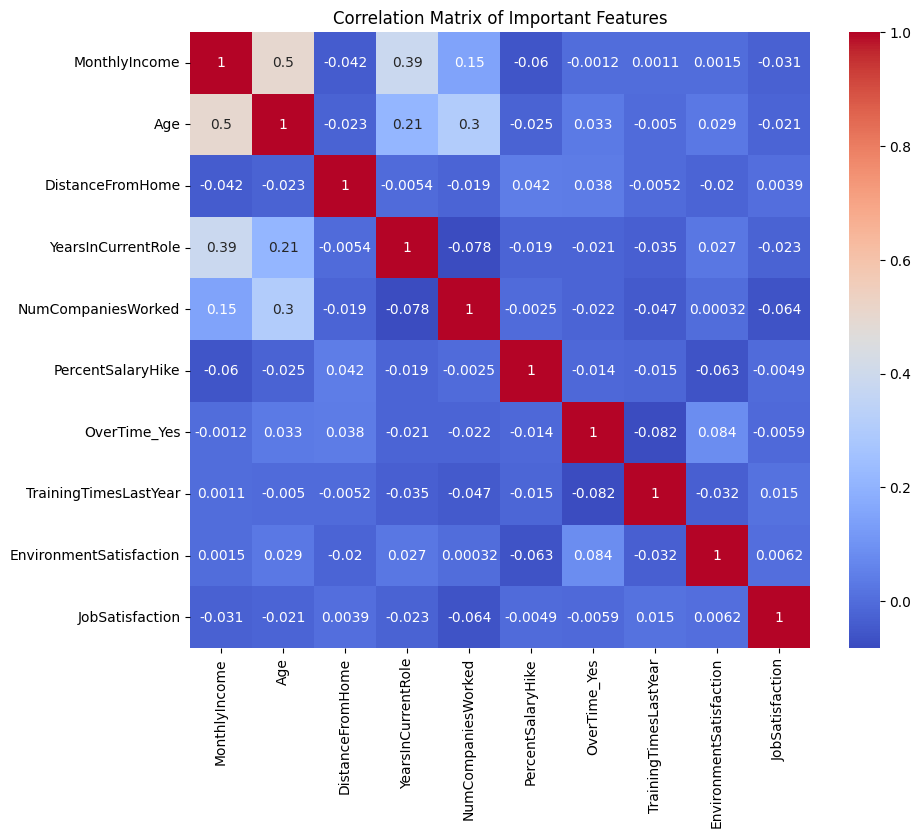

In [124]:
# Hitung matriks korelasi untuk fitur-fitur penting
correlation_matrix = df_encoded[top_10_features['Feature']].corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Important Features')
plt.show()

Insight :
* Monthly Income, Age, Distance From Home, Years In Current Role dan Num Companies Worked adalah lima kolom dengan tingkat pentingnya yang tinggi dalam model ini.
* Dengan akurasi mencapai 0.84, model Random Forest ini terbukti cukup andal dalam menangani ketidakseimbangan dan keberadaan outlier dalam data.

In [125]:
# isi attrition untuk data test yang attritionnya NAN
df_test = df_test.drop('Attrition',axis=1)
encoded_data_test = encoder.transform(df_test[categorical_columns])
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_columns)
df_test_encoded = pd.concat([df_test.drop(categorical_columns, axis=1), encoded_df_test], axis=1)

# Prediksi menggunakan model yang telah dilatih
predictions = model.predict(df_test_encoded)

# Isi nilai prediksi ke dalam DataFrame df_test_encoded
df_test_encoded['Attrition'] = predictions

# Hitung jumlah nilai prediksi
value_counts = df_test_encoded['Attrition'].value_counts()

# Tampilkan hasil
print(value_counts)


Attrition
0.0    401
1.0     11
Name: count, dtype: int64


In [126]:
# Menyisipkan kolom baru ke dalam DataFrame df_test pada posisi kolom nomor 1
df_test.insert(1, 'Attrition', predictions)

In [127]:
df_new = pd.concat([df_train,df_test],axis=0)

In [128]:
# Dictionary untuk mapping nilai ke label
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor Degree',
    4: 'Master',
    5: 'Doctor'
}

# Mengganti nilai di kolom 'Education'
df_new['Education'] = df_new['Education'].map(education_mapping)

In [129]:
# simpan data ke csv
df_new.to_csv('new_employee_data.csv',index=False)